# fake news prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Sabin Sapkota\Desktop\nlp\Data.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [3]:
df.shape

(4101, 27)

In [4]:
df.dtypes

Date     object
Label     int64
Top1     object
Top2     object
Top3     object
Top4     object
Top5     object
Top6     object
Top7     object
Top8     object
Top9     object
Top10    object
Top11    object
Top12    object
Top13    object
Top14    object
Top15    object
Top16    object
Top17    object
Top18    object
Top19    object
Top20    object
Top21    object
Top22    object
Top23    object
Top24    object
Top25    object
dtype: object

In [5]:
train=df[df['Date']<'20150101']  #slitting data on the basis of date ad train test split breaks order which i do not want

In [8]:
test=df[df['Date']>'20141231']  # test data

In [9]:
data=train.iloc[:,2:27]

In [10]:
data.replace('[^a-zA-Z]',' ',inplace=True)  #repalce non character by empty space

In [11]:
data.columns=[str(i) for i in range(25)]  # change the columns into integer

In [12]:
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,North Korea slave force earns Kim Jong Un regi...,"50,000 Yemeni Forces Preparing to Attack Saudi...",...,Report on sexual exploitation and abuse by pea...,Baby girl dies after X-president's son's staff...,China smog sparks r

In [13]:
data=data.apply(lambda x:x.str.lower())  # change to lower case
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins 'furious' at foster's lack of hannibal...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man's extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn't know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united's rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne (australia),necaxa (mexico),real madrid (spain),raja casablanca (morocco),corinthians (brazil),tony's pet project,al nassr (saudi arabia),ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,"auntie back in fashion, even if the dress look...",shoaib appeal goes to the top,hussain hurt by 'shambles' but lays blame on e...,england's decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for...,christmas glitches,"upending a table, chopping a line and scoring ...","scientific evidence 'unreliable', defence claims",fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake-up of failing nhs,lessons of law's hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers: are you all whingers?,hollywood beyond,ashes and diamonds,whingers - a formidable minority,alan parker - part two,"thuggery, toxins and ties",...,most everywhere: udis,most wanted: chloe lunettes,return of the cane 'completely off the agenda',from sleepy hollow to greeneland,blunkett outlines vision for over 11s,"embattled dobson attacks 'play now, pay later'...",doom and the dome,what is the north-south divide?,aitken released from jail,gone aloft


In [14]:
' '.join([i for i in data.iloc[1,:]])

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

In [15]:
headlines=[]
for i in range(len(data)):
    headlines.append(' '.join([str(i) for i in data.iloc[i,:]]))

In [16]:
headlines[0]

"a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title"

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',ngram_range=(2, 2))

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [18]:
text=tf.fit_transform(headlines)

In [21]:
model.fit(text,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [22]:
#train score
model.score(text,train['Label'])

1.0

In [24]:
headlines2=[]
for i in range(len(test)):
    headlines2.append(' '.join([i for i in test.iloc[i,2:27]]))

In [25]:
text1=tf.transform(headlines2)

In [27]:
# test score
model.score(text1,test['Label'])

0.8597883597883598

# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=100.0)

In [33]:
model.fit(text,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [34]:
# test score 
model.score(text1,test['Label'])

0.843915343915344

In [35]:
#train score
model.score(text,train['Label'])

1.0

In [41]:
model.predict(text1)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(model.predict(text1),test['Label'])

array([[141,  14],
       [ 45, 178]], dtype=int64)

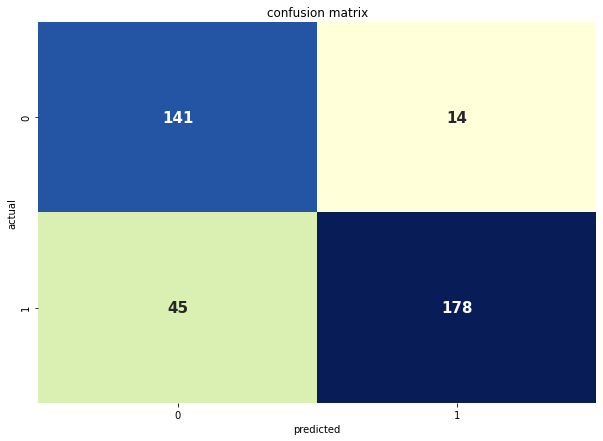

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(model.predict(text1),test['Label']),annot=True,fmt='d',cmap="YlGnBu",
            cbar=False,annot_kws={'fontweight':'bold','size':15})
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual');

# Xgboost Classifier

In [46]:
from xgboost import XGBClassifier
model=(XGBClassifier(use_label_encoder=False ))

In [47]:
model.fit(text,train['Label'])

[00:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [48]:
# test score 
model.score(text1,test['Label'])

0.8386243386243386

In [49]:
#train score
model.score(text,train['Label'])

0.8566037735849057

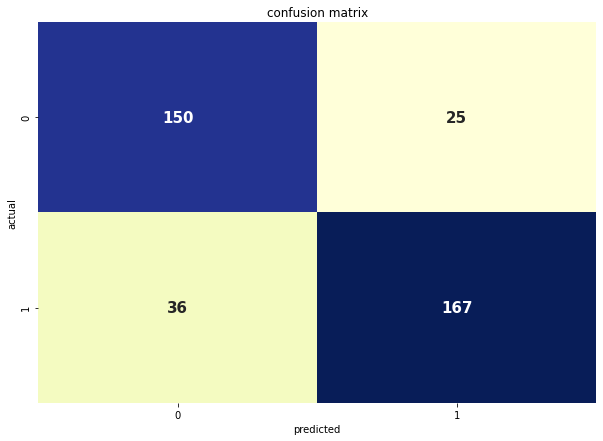

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(model.predict(text1),test['Label']),annot=True,fmt='d',cmap="YlGnBu",
            cbar=False,annot_kws={'fontweight':'bold','size':15})
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual');